In [115]:
import os 
from os import listdir 
from os.path import isfile, join
import numpy as np 
%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.image as img


#importing the images 
matrix = []

for filename in os.listdir('Train1'):
    face = img.imread((os.path.join('Train1',filename)))
    img2 = np.array(face).flatten()
    matrix.append(img2)
    
# image = img.imread('/Users/Kevin/cmsc426/StarterFiles/Test1/00001fb010.930831.jpg') ## Load an image as numpy array
# plt.imshow(image, interpolation='nearest') #display the image 
# plt.gray()  #grayscale conversion
# plt.show()

# img2 = image.flatten()



In [3]:
# read the first 10 rows and columns of the image
matrix

[array([130, 128, 127, ..., 129, 129, 129], dtype=uint8),
 array([133, 124, 129, ..., 130, 130, 130], dtype=uint8),
 array([127, 129, 133, ..., 129, 129, 129], dtype=uint8),
 array([129, 137, 123, ..., 130, 130, 130], dtype=uint8),
 array([132, 132, 135, ..., 130, 130, 130], dtype=uint8),
 array([129, 129, 129, ..., 129, 129, 129], dtype=uint8),
 array([133, 130, 130, ..., 129, 129, 129], dtype=uint8),
 array([131, 130, 130, ..., 131, 131, 131], dtype=uint8),
 array([128, 134, 133, ..., 130, 130, 130], dtype=uint8),
 array([127, 134, 120, ..., 128, 128, 128], dtype=uint8),
 array([128, 126, 127, ..., 128, 128, 128], dtype=uint8),
 array([136, 130, 129, ..., 129, 129, 129], dtype=uint8),
 array([125, 129, 131, ..., 129, 129, 129], dtype=uint8),
 array([125, 132, 120, ..., 128, 128, 128], dtype=uint8),
 array([125, 132, 120, ..., 128, 128, 128], dtype=uint8),
 array([130, 122, 129, ..., 129, 129, 129], dtype=uint8),
 array([124, 126, 129, ..., 129, 129, 129], dtype=uint8),
 array([128, 1

In [4]:
#creating the face matrix for the mean face
faces_matrix = np.vstack(matrix)
faces_matrix
faces_matrix.shape

(3772, 19500)

In [5]:
#mean centering the face
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape


(19500,)

(3772, 19500)

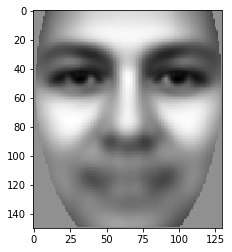

In [6]:
#meanFace
plt.imshow(mean_face.reshape(150,130),interpolation='nearest');
plt.gray()

# normalization
faces_norm = faces_matrix - mean_face
faces_norm.shape

In [7]:
#running svd on "A"
eigen_vecs, eigen_vals, yuna_val = np.linalg.svd(faces_norm)
eigen_vecs.shape


(3772, 3772)

In [8]:
#Transpose A and the multiply by A
M = faces_norm.T @ faces_norm

In [9]:
print(len(faces_norm[0]))
print(len(faces_norm))
print(eigen_vecs.shape)
print(eigen_vals.shape)
print(yuna_val.shape)
eigen_vecs

19500
3772
(3772, 3772)
(3772,)
(19500, 19500)


array([[-0.0081358 ,  0.00854096, -0.01505049, ..., -0.00042706,
         0.00101576,  0.01628224],
       [ 0.02024993,  0.01930073, -0.00696052, ...,  0.00550067,
         0.00295471,  0.01628224],
       [ 0.01857275,  0.01895537, -0.01496155, ...,  0.00860255,
         0.0073345 ,  0.01628224],
       ...,
       [ 0.01552093, -0.03654746,  0.01968337, ...,  0.00295515,
        -0.01065008,  0.01628224],
       [ 0.00015756,  0.01588133, -0.02676605, ...,  0.00193177,
        -0.00184793,  0.01628224],
       [-0.00051668,  0.01170239, -0.02660769, ..., -0.00564287,
         0.00309133,  0.01628224]])

In [10]:
#running getting eigenvectors from the MxM matrix 
eigen_vals, eigen_vecs = np.linalg.eig(M)
# # M.shape
eigen_vecs
# # eigen_vals
eigen_vecs.shape

(19500, 19500)

In [11]:
#running SVD on M
u,s,v = np.linalg.svd(M)
u.shape

(19500, 19500)

<ipython-input-111-cd4ccee25073>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  image = np.array(eigen_vecs, dtype=float)


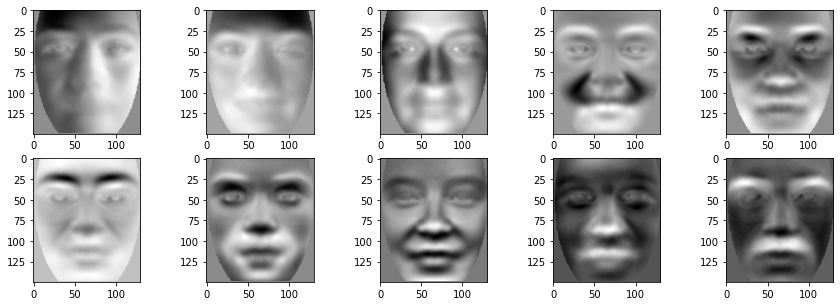

In [111]:
#EigenFaces
combine_face =[]
image = np.array(eigen_vecs, dtype=float)
fig, axs = plt.subplots(1,3,figsize=(15,5))

for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = image[:,i].reshape(150,130)
    combine_face.append(img)
    plt.imshow(img, cmap='gray')


In [121]:
#EigenFaces/Linear Combination 

# for i in np.arange(10):
#     img2 = image[:,i].reshape(150,130)
#     combine_face.append(img2)
#     plt.imshow(combine_face, cmap='gray')
#getting N^2 by N^2 Matrix 
A = faces_norm.dot(eigen_vecs)

# combine_face
# A.shape
flat = A.flatten()
flat.shape

(73554000,)

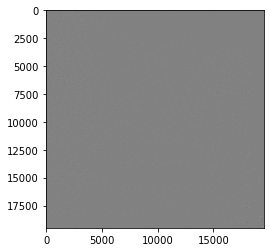

(150, 130)
(150, 130)
(150, 130)
[[ 1.88055764e-02 -3.73088656e-01 -9.42282319e-02 ... -8.51441020e+00
  -4.39657544e+00 -2.25709868e-01]
 [ 1.69093470e-02 -3.72422126e-01 -9.82164700e-02 ... -8.64240420e+00
  -4.49988802e+00 -2.28730172e-01]
 [ 1.52256529e-02 -3.70649554e-01 -1.03440532e-01 ... -8.72566170e+00
  -4.58486335e+00 -2.30577113e-01]
 ...
 [-7.50564948e-02 -5.33978974e-02  3.64336578e-01 ... -5.99624060e+00
  -4.87441297e+00 -1.67495306e-01]
 [-6.82602787e-02 -5.18454525e-02  3.42962535e-01 ... -5.61105418e+00
  -4.56638024e+00 -1.56477669e-01]
 [-2.86258775e-04  1.00551294e-04  1.07742434e-03 ... -1.30350148e-02
  -1.17281578e-02 -3.97084719e-04]]
(150, 130)
[[ 4.58134956e-01 -8.32963932e-01  1.42039115e+00 ...  2.11298794e+00
   6.74095341e+00  6.90069191e-02]
 [ 4.56677309e-01 -8.31900345e-01  1.40378075e+00 ...  2.08221630e+00
   6.72283632e+00  6.82529841e-02]
 [ 4.52722663e-01 -8.31491588e-01  1.36483775e+00 ...  1.81750426e+00
   6.52094567e+00  6.25087769e-02]
 ...


19977.77043059637

In [126]:
#facial recognition
#normalized 
# vector = faces_norm.flatten()

oldmanface = img.imread('/Users/Kevin/cmsc426/StarterFiles/Test1/00001fb010.930831.jpg') ## Load an image as numpy array
plt.imshow(image, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

testCase1 = oldmanface.flatten() - mean_face

# reshapedTest1 = testCase1.resize(150,130)
print(testCase1.reshape(150,130).shape)
print(combine_face[1].shape)
wPrime = []
min_dist = float('inf')
for eigenfaces in combine_face:
    w = np.matmul(eigenfaces,np.matmul(eigenfaces.T,testCase1.reshape(150,130)))
    print
    print(w.shape)
    print(w)
    distance = np.linalg.norm(w.flatten() - oldmanface.flatten())
    if distance < min_dist:
        min_dist = distance
    
    
# min_dist = np.linalg.norm(wPrime - oldmanface.flatten())

min_dist

# wPrime


# wPrime.shape
# convWprime = np.array(wPrime,dtype='float')

# plt.imshow(convWprime.resize(82,46),cmap='gray')


    
# test_images = []

# for filename in os.listdir('Train1'):
#     face = img.imread((os.path.join('Train1',filename)))
#     img2 = np.array(face).flatten()
#     test_images.append(img2)
    
# def Project(k,zero_mean_test,threshold):
#     matrixU = np.zeros((19500,k))
    
#     w = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
#     original_w_k = [k]
#     dist =[]
    
#     for wt_vectors in original_w_k:
#         dist.append(np.linalg.norm(wt_vectors-w.T))

#     nearest_face = np.argmin(dist)
#     nearest_face_weights = original_w_k[nearest_face]
#     fig1, axes_array = plt.subplots(1, 2)
#     fig1.set_size_inches(3,3)
#     zero_mean_test =zero_mean_test + np.transpose(mean_face)
#     zero_mean_test = zero_mean_test.reshape(150,130)
#     image_plot = axes_array[0].imshow(zero_mean_test,cmap=plt.cm.gray)
#     axes_array[0].axis('off')
#     axes_array[0].set(title='Test Face')

#     face = np.dot(nearest_face_weights, np.transpose(matrixU))
#     face = face+np.transpose(mean_face)
#     reshape_face = face.reshape(300,130)
#     if np.min(dist)<threshold:  #Nonface
#         image_plot = axes_array[1].imshow(reshape_face,cmap=plt.cm.gray)
#     axes_array[1].axis('off')
#     axes_array[1].set(title='Recognized Face')
#     plt.show()
    
# def runs(k):
#     for num in range(0,len(test_images)):#t in test_images:
#         t = test_images[num]
#         test = t.flatten()
#         zero_mean_test = test-np.transpose(mean_face)
#         Project(k,zero_mean_test,80)  #threshold =80
        
# runs(2)
# print('\t\tk=5')
# runs(5)
# print('\t\tk=15')
# runs(15)
    


# w = faces_norm.T @ faces_norm
